In [1]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import altair as alt

In [3]:
# Define the column widths based on the Fortran format
colspecs = [
    (0, 1),      # cc (1 char)
    (1, 4),      # NZ (i3)
    (4, 9),      # N (i5)
    (9, 14),     # Z (i5)
    (14, 19),    # A (i5)
    (19, 20),    # space
    (20, 23),    # EL (a3)
    (23, 27),    # O (a4)
    (27, 28),    # space
    (28, 42),    # mass excess (f14.6)
    (42, 54),    # mass uncertainty (f12.6)
    (54, 67),    # binding energy (f13.5)
    (67, 68),    # space
    (68, 78),    # B (f10.5)
    (78, 79),    # space
    (79, 81),    # beta (a2)
    (81, 94),    # beta uncertainty (f13.5)
    (94, 105),   # atomic mass (f11.5)
    (105, 106),  # space
    (106, 109),  # integer (i3)
    (109, 110),  # space
    (110, 123),  # f13.6
    (123, 135),  # f12.6
]

# Column names (adapt to your preference)
colnames = [
    "cc", "1N-Z", "n", "z", "A", "space1", "EL", "O", "space2",
    "mass_excess", "mass_unc", "binding_energy", "space3",
    "bind_ener_unc", "space4", "beta_mode", "beta_ener","beta_unc" ,"space5", "space6",
    "space7", "atomic_mass", "atom_mass_unc"
]

# Read the fixed-width file
df_ame = pd.read_fwf("ame2020.txt", colspecs=colspecs, names=colnames, skiprows=36)

# Optionally, drop the space columns
df_ame = df_ame.drop(columns=[c for c in colnames if "space" in c])
df_ame = df_ame.drop(columns='cc')

# Convert numeric columns to floats
numeric_cols = ["1N-Z", "n", "z", "A", "mass_excess", "mass_unc", "binding_energy",
                "bind_ener_unc","beta_ener" ,"beta_unc", "atomic_mass", "atom_mass_unc"]
for col in numeric_cols:
    df_ame[col] = pd.to_numeric(df_ame[col], errors="coerce")

# display(df_ame)

In [6]:
df_ame['binding_energy'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3558 entries, 0 to 3557
Series name: binding_energy
Non-Null Count  Dtype  
--------------  -----  
2550 non-null   float64
dtypes: float64(1)
memory usage: 27.9 KB


In [13]:
df_ame = df_ame.fillna(df_ame.mean(numeric_only=True))
df_ame.head(10)

1N-Z  n  z  A  EL    O   mass_excess    mass_unc  binding_energy  \
0     1  1  0  1   n  NaN   8071.318060    0.000440        0.000000   
1    -1  0  1  1   H  NaN   7288.971064    0.000013        0.000000   
2     0  1  1  2   H  NaN  13135.722895    0.000015     1112.283100   
3     1  2  1  3   H  NaN  14949.810900    0.000080     2827.265400   
4    -1  1  2  3  He  NaN  14931.218880    0.000060     2572.680440   
5    -3  0  3  3  Li  -pp -37392.263820   24.934570     8044.660179   
6     2  3  1  4   H   -n  24621.129000  100.000000     1720.449100   
7     0  2  2  4  He  NaN   2424.915870    0.000150     7073.915600   
8    -2  1  3  4  Li   -p  25323.190000  212.132000     1153.760300   
9     3  4  1  5   H  -nn  32892.447000   89.443000     1336.359200   

   bind_ener_unc beta_mode     beta_ener    beta_unc    atomic_mass  \
0       0.000000        B-    782.347000    0.000400    8664.915900   
1       0.000000        B-   -241.709031   31.379524    7825.031898   
2       0.000200        B-   -241.709031   31.379524   14101.777844   
3       0.000300        B-     18.592020    0.000060   16049.281320   
4       0.000150        B-   -241.709031   31.379524   16029.321970   
5       0.444903        B-   -241.709031   31.379524  759857.755257   
6      25.000000        B-  22196.213100  100.000000   26431.867000   
7       0.000200        B- -22898.274000  212.132000    2603.254130   
8      53.033000        B-   -241.709031   31.379524   27185.561000   
9      17.888500        B-  21661.213100   91.651500   35311.492000   

   atom_mass_unc  
0       0.000470  
1       0.000014  
2       0.000015  
3       0.000080  
4       0.000060  
5      26.767963  
6     107.354000  
7       0.000160  
8     227.733000  
9      96.020000

In [24]:
df_ec = df_ame.copy()

parity_conditions = [
(df_ec['n'] % 2 == 0) & (df_ec['z'] % 2 == 0), # is n&z even?
((df_ec['n'] % 2 != 0) & (df_ec['z'] % 2 == 0)) | # is n&z even&odd or...  
((df_ec['n'] % 2 == 0) & (df_ec['z'] % 2 != 0)), # vice versa?
(df_ec['n'] % 2 != 0) & (df_ec['z'] % 2 != 0) # is n&z odd?
]

parity_labels = ['Even-Even', 'Even-Odd', 'Odd-Odd']

# print(parity_conditions)
df_merge['parity'] = np.select(parity_conditions, parity_labels,default=str)
df_merge['parity']

0        Even-Odd
1        Even-Odd
2         Odd-Odd
3        Even-Odd
4        Even-Odd
          ...    
3553     Even-Odd
3554     Even-Odd
3555      Odd-Odd
3556    Even-Even
3557     Even-Odd
Name: parity, Length: 3558, dtype: object

In [3]:
df_ame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   1N-Z            3558 non-null   int64  
 1   n               3558 non-null   int64  
 2   z               3558 non-null   int64  
 3   A               3558 non-null   int64  
 4   EL              3558 non-null   object 
 5   O               2353 non-null   object 
 6   mass_excess     2550 non-null   float64
 7   mass_unc        2550 non-null   float64
 8   binding_energy  2550 non-null   float64
 9   bind_ener_unc   2550 non-null   float64
 10  beta_mode       3558 non-null   object 
 11  beta_ener       2250 non-null   float64
 12  beta_unc        2250 non-null   float64
 13  atomic_mass     2550 non-null   float64
 14  atom_mass_unc   2550 non-null   float64
dtypes: float64(8), int64(4), object(3)
memory usage: 417.1+ KB


In [4]:
df_ame.describe()

1N-Z            n            z            A    mass_excess  \
count  3558.000000  3558.000000  3558.000000  3558.000000    2550.000000   
mean     24.474986    82.442945    57.967960   140.410905  -37392.263820   
std      17.861093    43.678883    28.032564    71.192136   43609.112187   
min      -8.000000     0.000000     0.000000     1.000000  -91652.843000   
25%      10.000000    47.000000    36.000000    84.000000  -71253.460750   
50%      22.000000    81.000000    58.000000   139.000000  -50492.446000   
75%      38.000000   115.000000    80.000000   194.000000  -11063.531500   
max      64.000000   177.000000   118.000000   295.000000  134834.671000   

          mass_unc  binding_energy  bind_ener_unc     beta_ener     beta_unc  \
count  2550.000000     2550.000000    2550.000000   2250.000000  2250.000000   
mean     24.934570     8044.660179       0.444903   -241.709031    31.379524   
std      67.967021      735.971505       2.322854   6759.972072    71.782515   
min       0.000000        0.000000       0.000000 -23956.621500     0.000060   
25%       1.584000     7817.609975       0.013325  -4922.391125     3.155425   
50%       6.100000     8173.382400       0.047700   -751.764000    10.953600   
75%      18.027500     8446.214450       0.126550   3649.254025    28.703900   
max     838.345000     8794.555500      53.033000  31898.001900   838.694500   

         atomic_mass  atom_mass_unc  
count    2550.000000    2550.000000  
mean   759857.755257      26.767963  
std    362967.975066      72.965623  
min         0.000000       0.000000  
25%    906484.396750       1.700000  
50%    927250.379500       6.548500  
75%    952515.220250      19.353000  
max    999981.252000     900.000000

In [5]:
df_rc = pd.read_csv('charge_radius.csv')
display(df_rc)

z symbol    n    a  radius_val  radius_unc  radius_preliminary_val  \
0     0      n    1    1     -0.1149      0.0027                     NaN   
1     1      H    0    1      0.8783      0.0086                     NaN   
2     1      H    1    2      2.1421      0.0088                     NaN   
3     1      H    2    3      1.7591      0.0363                     NaN   
4     2     He    1    3      1.9661      0.0030                     NaN   
..   ..    ...  ...  ...         ...         ...                     ...   
952  84     Po  119  203         NaN         NaN                  5.5297   
953  84     Po  127  211         NaN         NaN                  5.5798   
954  87     Fr  115  202         NaN         NaN                  5.5505   
955  87     Fr  116  203         NaN         NaN                  5.5560   
956  87     Fr  118  205         NaN         NaN                  5.5609   

     radius_preliminary_unc  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
..                      ...  
952                  0.0189  
953                  0.0187  
954                  0.0178  
955                  0.0178  
956                  0.0178  

[957 rows x 8 columns]

In [35]:
df_ec = df_rc.copy()

parity_conditions = [
(df_ec['n'] % 2 == 0) & (df_ec['z'] % 2 == 0), # is n&z even?
((df_ec['n'] % 2 != 0) & (df_ec['z'] % 2 == 0)) | # is n&z even&odd or...  
((df_ec['n'] % 2 == 0) & (df_ec['z'] % 2 != 0)), # vice versa?
(df_ec['n'] % 2 != 0) & (df_ec['z'] % 2 != 0) # is n&z odd?
]

parity_labels = ['Even-Even', 'Even-Odd', 'Odd-Odd']

# print(parity_conditions)
print(len(df_ec),len(parity_conditions[0])*4)
# df_merge['parity'] = np.select(parity_conditions, parity_labels,default=str)
# df_merge['parity']

957 3828


In [6]:
df_rc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   z                       957 non-null    int64  
 1   symbol                  957 non-null    object 
 2   n                       957 non-null    int64  
 3   a                       957 non-null    int64  
 4   radius_val              909 non-null    float64
 5   radius_unc              909 non-null    float64
 6   radius_preliminary_val  147 non-null    float64
 7   radius_preliminary_unc  147 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 59.9+ KB


In [7]:
df_rc.describe()

z           n           a  radius_val  radius_unc  \
count  957.000000  957.000000  957.000000  909.000000  909.000000   
mean    54.748171   76.220481  130.968652    4.715438    0.016946   
std     23.598461   36.057028   59.404798    0.817895    0.038789   
min      0.000000    0.000000    1.000000   -0.114900    0.001000   
25%     38.000000   51.000000   90.000000    4.305200    0.003000   
50%     56.000000   80.000000  137.000000    4.880700    0.005100   
75%     76.000000  105.000000  182.000000    5.381200    0.015800   
max     96.000000  152.000000  248.000000    5.904800    0.313900   

       radius_preliminary_val  radius_preliminary_unc  
count              147.000000              147.000000  
mean                 4.710833                0.010620  
std                  0.976440                0.006803  
min                  2.361000                0.000000  
25%                  3.998550                0.004800  
50%                  5.252500                0.008300  
75%                  5.514100                0.017600  
max                  5.761400                0.029200

In [8]:
keys = ["z", "n"]

df_merge = pd.merge(df_ame , df_rc , on = keys , how = "outer" )

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   1N-Z                    3558 non-null   int64  
 1   n                       3558 non-null   int64  
 2   z                       3558 non-null   int64  
 3   A                       3558 non-null   int64  
 4   EL                      3558 non-null   object 
 5   O                       2353 non-null   object 
 6   mass_excess             2550 non-null   float64
 7   mass_unc                2550 non-null   float64
 8   binding_energy          2550 non-null   float64
 9   bind_ener_unc           2550 non-null   float64
 10  beta_mode               3558 non-null   object 
 11  beta_ener               2250 non-null   float64
 12  beta_unc                2250 non-null   float64
 13  atomic_mass             2550 non-null   float64
 14  atom_mass_unc           2550 non-null   

In [9]:
df_merge.describe()

1N-Z            n            z            A    mass_excess  \
count  3558.000000  3558.000000  3558.000000  3558.000000    2550.000000   
mean     24.474986    82.442945    57.967960   140.410905  -37392.263820   
std      17.861093    43.678883    28.032564    71.192136   43609.112187   
min      -8.000000     0.000000     0.000000     1.000000  -91652.843000   
25%      10.000000    47.000000    36.000000    84.000000  -71253.460750   
50%      22.000000    81.000000    58.000000   139.000000  -50492.446000   
75%      38.000000   115.000000    80.000000   194.000000  -11063.531500   
max      64.000000   177.000000   118.000000   295.000000  134834.671000   

          mass_unc  binding_energy  bind_ener_unc     beta_ener     beta_unc  \
count  2550.000000     2550.000000    2550.000000   2250.000000  2250.000000   
mean     24.934570     8044.660179       0.444903   -241.709031    31.379524   
std      67.967021      735.971505       2.322854   6759.972072    71.782515   
min       0.000000        0.000000       0.000000 -23956.621500     0.000060   
25%       1.584000     7817.609975       0.013325  -4922.391125     3.155425   
50%       6.100000     8173.382400       0.047700   -751.764000    10.953600   
75%      18.027500     8446.214450       0.126550   3649.254025    28.703900   
max     838.345000     8794.555500      53.033000  31898.001900   838.694500   

         atomic_mass  atom_mass_unc           a  radius_val  radius_unc  \
count    2550.000000    2550.000000  957.000000  909.000000  909.000000   
mean   759857.755257      26.767963  130.968652    4.715438    0.016946   
std    362967.975066      72.965623   59.404798    0.817895    0.038789   
min         0.000000       0.000000    1.000000   -0.114900    0.001000   
25%    906484.396750       1.700000   90.000000    4.305200    0.003000   
50%    927250.379500       6.548500  137.000000    4.880700    0.005100   
75%    952515.220250      19.353000  182.000000    5.381200    0.015800   
max    999981.252000     900.000000  248.000000    5.904800    0.313900   

       radius_preliminary_val  radius_preliminary_unc  
count              147.000000              147.000000  
mean                 4.710833                0.010620  
std                  0.976440                0.006803  
min                  2.361000                0.000000  
25%                  3.998550                0.004800  
50%                  5.252500                0.008300  
75%                  5.514100                0.017600  
max                  5.761400                0.029200

In [10]:
display(df_merge)

1N-Z    n    z    A  EL    O   mass_excess    mass_unc  binding_energy  \
0        1    1    0    1   n  NaN   8071.318060    0.000440          0.0000   
1       -1    0    1    1   H  NaN   7288.971064    0.000013          0.0000   
2        0    1    1    2   H  NaN  13135.722895    0.000015       1112.2831   
3        1    2    1    3   H  NaN  14949.810900    0.000080       2827.2654   
4        2    3    1    4   H   -n  24621.129000  100.000000       1720.4491   
...    ...  ...  ...  ...  ..  ...           ...         ...             ...   
3553    59  176  117  293  Ts   -a           NaN         NaN             NaN   
3554    60  177  117  294  Ts   -a           NaN         NaN             NaN   
3555    57  175  118  293  Og   -a           NaN         NaN             NaN   
3556    58  176  118  294  Og   -a           NaN         NaN             NaN   
3557    59  177  118  295  Og   -a           NaN         NaN             NaN   

      bind_ener_unc  ...    beta_ener   beta_unc   atomic_mass  atom_mass_unc  \
0            0.0000  ...    782.34700    0.00040   8664.915900       0.000470   
1            0.0000  ...          NaN        NaN   7825.031898       0.000014   
2            0.0002  ...          NaN        NaN  14101.777844       0.000015   
3            0.0003  ...     18.59202    0.00006  16049.281320       0.000080   
4           25.0000  ...  22196.21310  100.00000  26431.867000     107.354000   
...             ...  ...          ...        ...           ...            ...   
3553            NaN  ...          NaN        NaN           NaN            NaN   
3554            NaN  ...          NaN        NaN           NaN            NaN   
3555            NaN  ...          NaN        NaN           NaN            NaN   
3556            NaN  ...          NaN        NaN           NaN            NaN   
3557            NaN  ...          NaN        NaN           NaN            NaN   

      symbol    a  radius_val  radius_unc  radius_preliminary_val  \
0          n  1.0     -0.1149      0.0027                     NaN   
1          H  1.0      0.8783      0.0086                     NaN   
2          H  2.0      2.1421      0.0088                     NaN   
3          H  3.0      1.7591      0.0363                     NaN   
4        NaN  NaN         NaN         NaN                     NaN   
...      ...  ...         ...         ...                     ...   
3553     NaN  NaN         NaN         NaN                     NaN   
3554     NaN  NaN         NaN         NaN                     NaN   
3555     NaN  NaN         NaN         NaN                     NaN   
3556     NaN  NaN         NaN         NaN                     NaN   
3557     NaN  NaN         NaN         NaN                     NaN   

      radius_preliminary_unc  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
...                      ...  
3553                     NaN  
3554                     NaN  
3555                     NaN  
3556                     NaN  
3557                     NaN  

[3558 rows x 21 columns]

In [17]:
df_merge.to_csv('ame2020_rc_merged_data_sets.csv')
df_merge.columns

Index(['1N-Z', 'n', 'z', 'A', 'EL', 'O', 'mass_excess', 'mass_unc',
       'binding_energy', 'bind_ener_unc', 'beta_mode', 'beta_ener', 'beta_unc',
       'atomic_mass', 'atom_mass_unc', 'symbol', 'a', 'radius_val',
       'radius_unc', 'radius_preliminary_val', 'radius_preliminary_unc',
       'parity_encoder', 'isospin_asymmetry'],
      dtype='object')

In [12]:
parity_encoder_list = []
isospin_asymmetry_list = []

for idx,row in df_merge.iterrows() :
    n_val = row['n']
    z_val = row['z']
    a_val = row['a']

    isospin_asymmetry = 1 - 2 * z_val/a_val
    isospin_asymmetry_list.append(isospin_asymmetry)

    if n_val % 2 == 0 and z_val % 2 == 0 :
        parity_val = 'Even-Even'
    elif (n_val % 2 != 0 and z_val % 2 == 0) or (n_val % 2 == 0 and z_val % 2 != 0) :
        parity_val = 'Even-Odd'
    elif n_val % 2 != 0 and z_val % 2 != 0 :
        parity_val = 'Odd-Odd'
    parity_encoder_list.append(parity_val)

df_merge['parity_encoder'] = parity_encoder_list
df_merge['isospin_asymmetry'] = isospin_asymmetry_list
df_merge['binding_energy'] = df_merge['binding_energy'].to_numpy()/1000

In [13]:
df_comp = df_merge.copy()

columns_to_scale = ['mass_excess','binding_energy','beta_ener','atomic_mass','radius_val']
other_columns = [col for col in df_comp.columns if col not in columns_to_scale]

scaler_flag = 0 # 0 = standard,1=minmax

if scaler_flag == 0 :
    scaler = StandardScaler()
elif scaler_flag == 1 :
    scaler = MinMaxScaler()
    
scaled_array = scaler.fit_transform(df_comp[columns_to_scale])

scaled_df_columns = pd.DataFrame(scaled_array, columns=columns_to_scale, index=df_comp.index)

df_final = pd.concat([scaled_df_columns, df_comp[other_columns]], axis=1)

In [14]:
alt.renderers.enable('mimetype')

chart = alt.Chart(df_final).mark_point().encode(
    y='binding_energy',
    x='a',
    color='parity_encoder',
    tooltip=['EL', 'z', 'n','a','binding_energy']
).properties(
    width=600,
    height=400
).interactive()

chart

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [30]:
alt.renderers.enable('mimetype')

chart = alt.Chart(df_final).mark_point().encode(
    y='binding_energy',
    x='radius_val',
    color='parity_encoder',
    tooltip=['EL', 'z', 'n']
).properties(
    width=600,
    height=400
).interactive()

chart

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [31]:
alt.renderers.enable('mimetype')
df_merge['a^1/3']=df_merge['a'].to_numpy()**(1/3)

chart = alt.Chart(df_final).mark_point().encode(
    x='a^1/3',
    y='radius_val',
    color='parity_encoder',
    tooltip=['EL', 'z', 'n']
).properties(
    width=600,
    height=400
).interactive()

chart

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [32]:
alt.renderers.enable('mimetype')

chart = alt.Chart(df_final).mark_bar().encode(
    y='binding_energy',
    x='EL',
    color='parity_encoder',
    tooltip=['EL', 'z', 'n']
).properties(
    width=600,
    height=400
).interactive()

chart

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [33]:
alt.renderers.enable('mimetype')

chart = alt.Chart(df_final).mark_bar().encode(
    y='beta_ener',
    x='isospin_asymmetry',
    color='parity_encoder',
    tooltip=['EL', 'z', 'n']
).properties(
    width=600,
    height=400
).interactive()

chart

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [ ]:
alt.renderers.enable('mimetype')

z_val = 8
df_iso = df_merge[df_merge['z'] == z_val]

chart = alt.Chart(df_iso).mark_line(point=True).encode(
    x='n',  # neutrons varying
    y=alt.Y('binding_energy', title='Binding Energy per Nucleon [MeV]'),
    tooltip=['EL','z','n','a']
).properties(
    title=f'Isotopic Chain Z={z_val}'
).interactive()

chart

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


/home/jabelieu/Desktop/cmse830_fds/.venv_fds/lib/python3.12/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant: nan
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


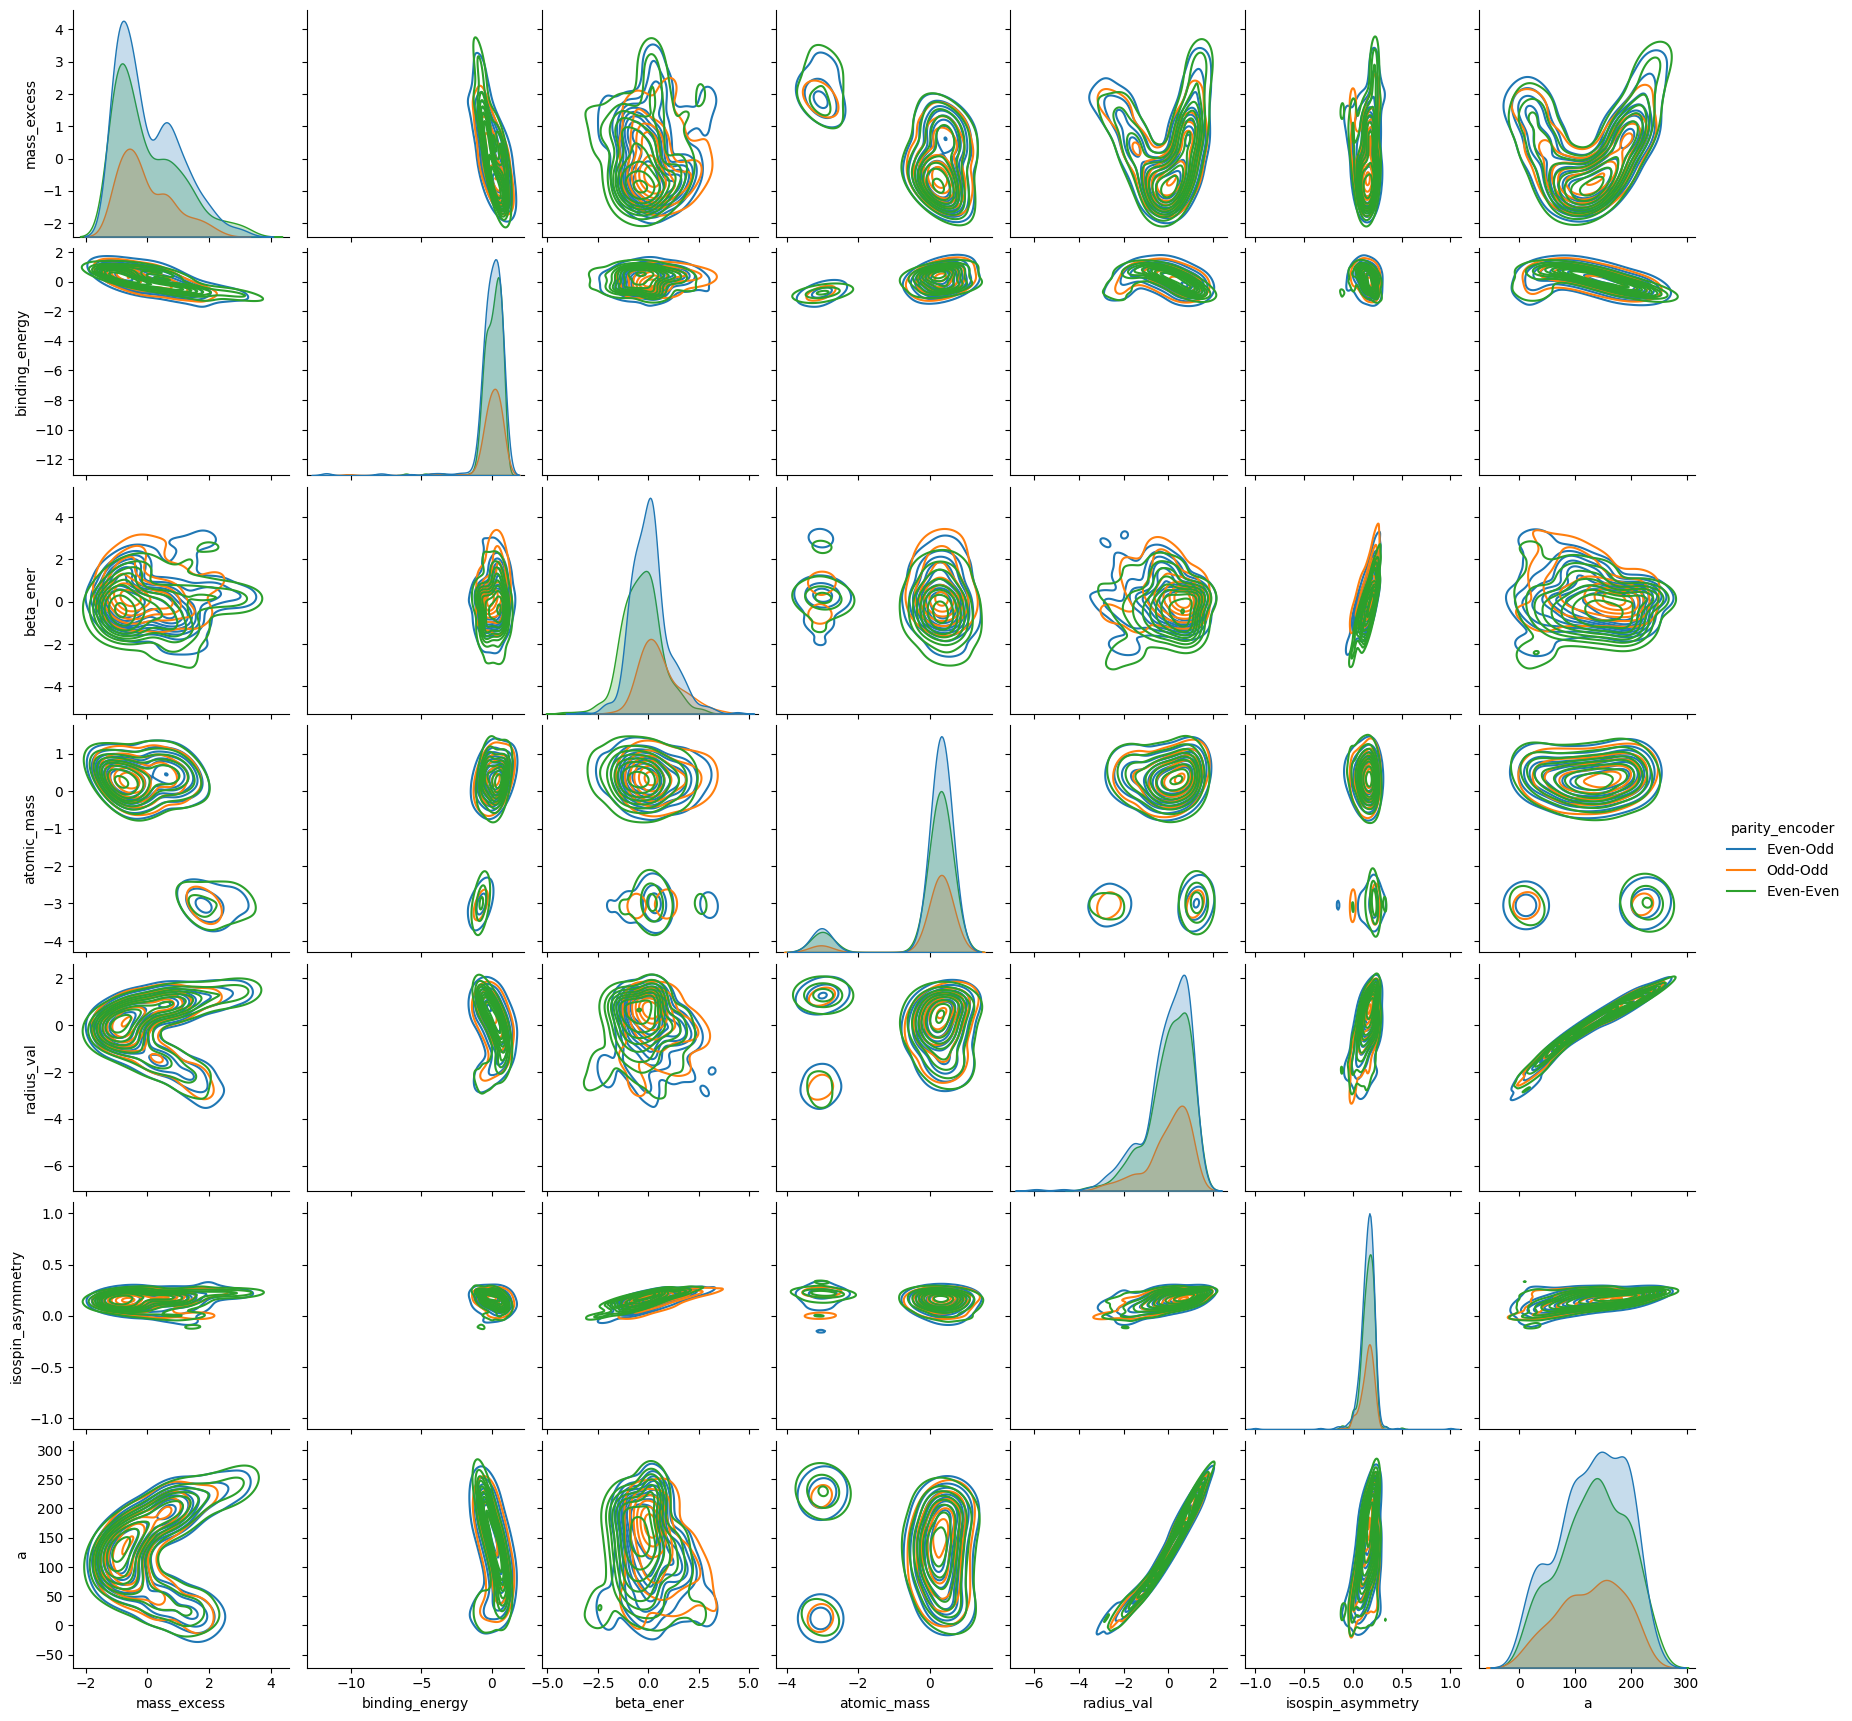

In [41]:
sns.pairplot(df_final[columns_to_scale + ['isospin_asymmetry','parity_encoder','a']], hue='parity_encoder',kind='kde');

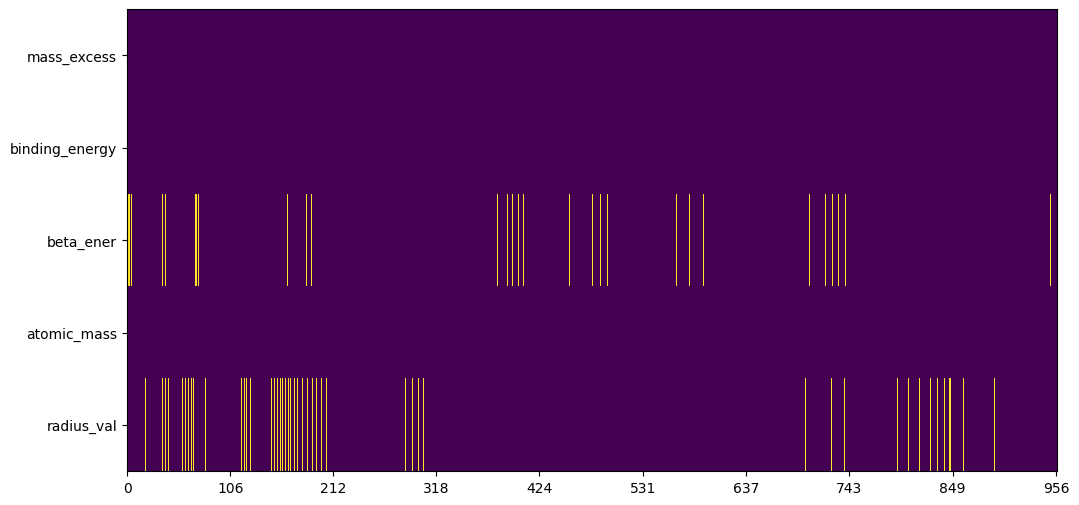

In [98]:
df_planets_subset = df_final[columns_to_scale]

# create a boolean mask: True for NaN, False for finite values
nan_mask = df_planets_subset.isna()

# convert boolean mask to integer (False becomes 0, True becomes 1)
nan_array = nan_mask.astype(int).to_numpy()

# size the plot
plt.figure(figsize=(12, 6))

# imshow with interpolation set to 'nearest' and aspect to 'auto'
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')
plt.yticks(range(len(df_planets_subset.columns)), df_planets_subset.columns)
num_planets = nan_array.shape[0]
plt.xticks(np.linspace(0, num_planets-1, min(10, num_planets)).astype(int));

idea : a scatter plot where you can vary the power of A to see if you can get the best correlation with radius val.

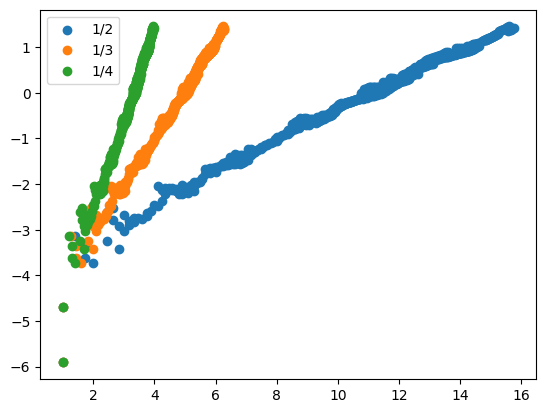

In [83]:
for i in range ( 2,5 ) :

    # plt.scatter(df_final['a'].to_numpy()**i,df_final['radius_val'],label=i);
    plt.scatter(df_final['a'].to_numpy()**(1/i),df_final['radius_val'],label=f'1/{i}')
    
plt.legend();